In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('./spam.csv', encoding='ISO-8859-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
# 1. Data cleaning


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.sample(5)

,v1,v2
2115,ham,Well I wasn't available as I washob nobbing wi...
1197,ham,He also knows about lunch menu only da. . I know
1139,ham,Message:some text missing* Sender:Name Missing...
3176,ham,In meeting da. I will call you
3423,spam,Am new 2 club & dont fink we met yet Will B gr...


In [10]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
3279,ham,Badrith is only for chennai:)i will surely pic...
3516,ham,So you think i should actually talk to him? No...
4641,spam,You are being ripped off! Get your mobile cont...
869,spam,What do U want for Xmas? How about 100 free te...
4226,ham,Buy one egg for me da..please:)


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
# check for duplicate values
df.duplicated().sum()

403

In [16]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

In [19]:
# 2.EDA

In [20]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

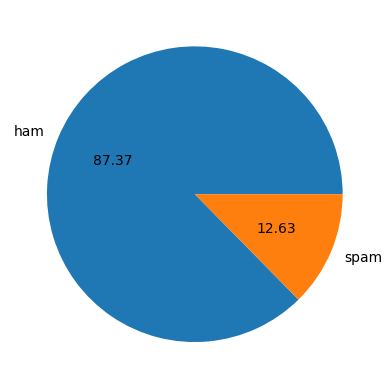

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [23]:
ham = df[df['target'] == 0]
spam = df[df['target'] == 1]

In [24]:
print(ham.shape)
print(spam.shape)

(4516, 2)
(653, 2)


In [25]:
ham_sample=ham.sample(n=653)

In [26]:
len(ham_sample)

653

In [27]:
df=pd.concat([ham_sample,spam],axis=0)

In [28]:
df.head()

,target,text
3209,0,"She said,'' do u mind if I go into the bedroom..."
2261,0,Did you show him and wot did he say or could u...
3616,0,Sorry sent blank msg again. Yup but trying 2 d...
3181,0,"My Parents, My Kidz, My Friends n My Colleague..."
4938,0,Tomarrow i want to got to court. At &lt;DECIM...


In [29]:
df.tail()

,target,text
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...
5567,1,This is the 2nd time we have tried 2 contact u...


In [30]:
import nltk
!pip install nltk
nltk.download('punkt')


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chenn\AppData\Roaming\nltk_data...


[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
3209,0,"She said,'' do u mind if I go into the bedroom...",145
2261,0,Did you show him and wot did he say or could u...,64
3616,0,Sorry sent blank msg again. Yup but trying 2 d...,74
3181,0,"My Parents, My Kidz, My Friends n My Colleague...",130
4938,0,Tomarrow i want to got to court. At &lt;DECIM...,85


In [32]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
3209,0,"She said,'' do u mind if I go into the bedroom...",145,43
2261,0,Did you show him and wot did he say or could u...,64,18
3616,0,Sorry sent blank msg again. Yup but trying 2 d...,74,16
3181,0,"My Parents, My Kidz, My Friends n My Colleague...",130,32
4938,0,Tomarrow i want to got to court. At &lt;DECIM...,85,26


In [33]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
3209,0,"She said,'' do u mind if I go into the bedroom...",145,43,3
2261,0,Did you show him and wot did he say or could u...,64,18,1
3616,0,Sorry sent blank msg again. Yup but trying 2 d...,74,16,2
3181,0,"My Parents, My Kidz, My Friends n My Colleague...",130,32,5
4938,0,Tomarrow i want to got to court. At &lt;DECIM...,85,26,3


In [34]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1306.000000,1306.000000,1306.000000
mean,106.460184,22.792496,2.408882
std,59.958878,12.543404,1.505967
min,3.000000,1.000000,1.000000
25%,50.000000,12.000000,1.000000
50%,119.000000,25.000000,2.000000
75%,153.000000,31.000000,3.000000
max,910.000000,175.000000,14.000000


In [35]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,75.029096,17.917305,1.846861
std,65.639217,14.771238,1.300475
min,3.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,54.000000,14.000000,1.000000
75%,100.000000,23.000000,2.000000
max,910.000000,175.000000,14.000000


In [36]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

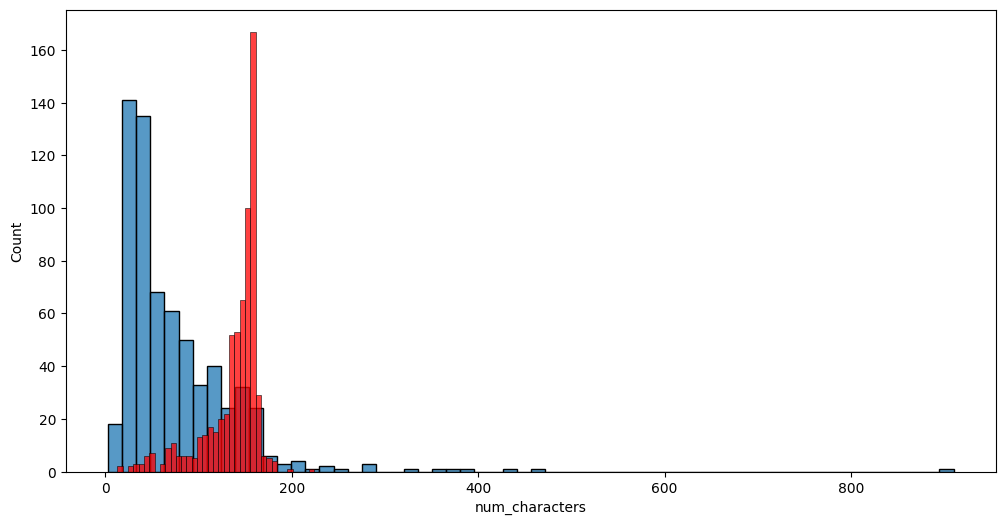

In [37]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

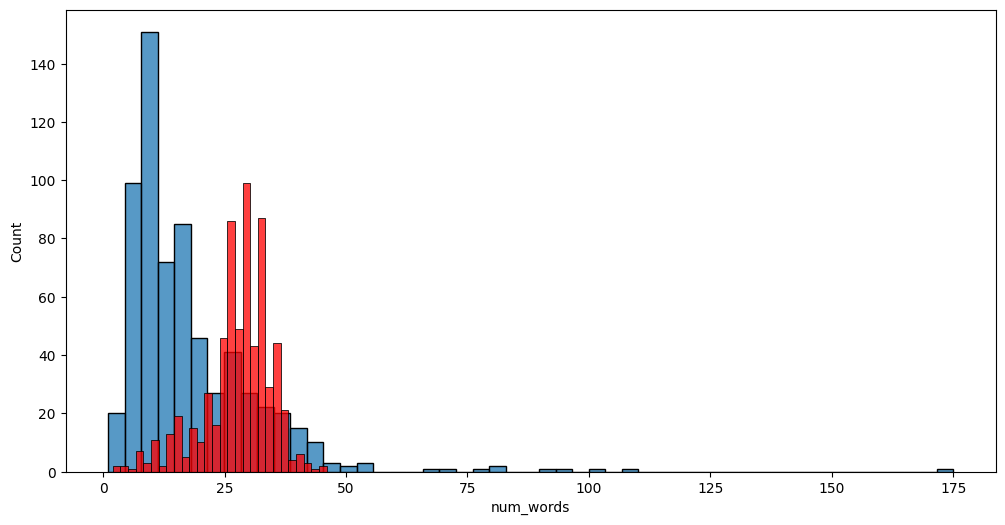

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

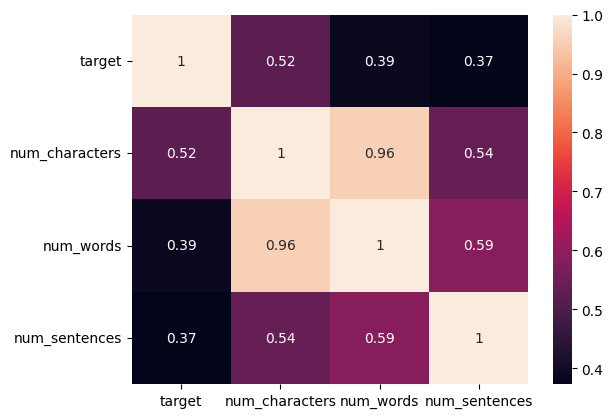

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Create the heatmap
sns.heatmap(numeric_df.corr(), annot=True)

# Display the heatmap
plt.show()


In [40]:
# 3. Data Preprocessing

In [41]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(l.lemmatize(i))
    
            
    return " ".join(y)

In [42]:
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chenn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
from nltk.stem import WordNetLemmatizer
l = WordNetLemmatizer()
l.lemmatize('loving', pos='v')

'love'

In [44]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
3209,0,"She said,'' do u mind if I go into the bedroom...",145,43,3,said u mind go bedroom minute ok sed sexy mood...
2261,0,Did you show him and wot did he say or could u...,64,18,1,show wot say could u c 4 dust
3616,0,Sorry sent blank msg again. Yup but trying 2 d...,74,16,2,sorry sent blank msg yup trying 2 serious stud...
3181,0,"My Parents, My Kidz, My Friends n My Colleague...",130,32,5,parent kidz friend n colleague screaming surpr...
4938,0,Tomarrow i want to got to court. At &lt;DECIM...,85,26,3,tomarrow want got court lt decimal gt come bus...


In [45]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

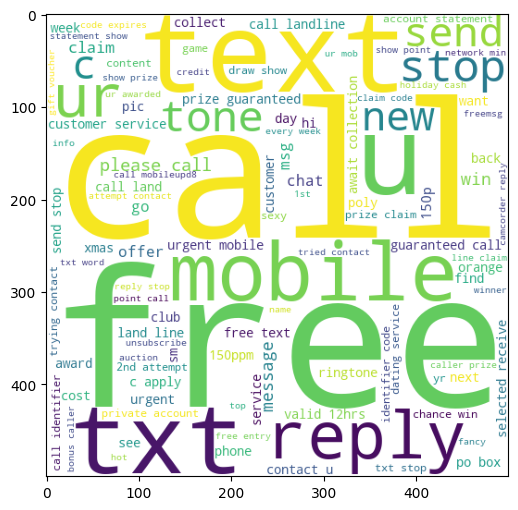

In [46]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

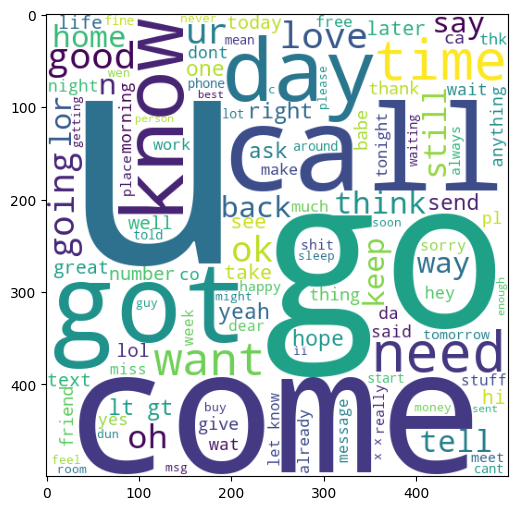

In [47]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [48]:
df.head()


,target,text,num_characters,num_words,num_sentences,transformed_text
3209,0,"She said,'' do u mind if I go into the bedroom...",145,43,3,said u mind go bedroom minute ok sed sexy mood...
2261,0,Did you show him and wot did he say or could u...,64,18,1,show wot say could u c 4 dust
3616,0,Sorry sent blank msg again. Yup but trying 2 d...,74,16,2,sorry sent blank msg yup trying 2 serious stud...
3181,0,"My Parents, My Kidz, My Friends n My Colleague...",130,32,5,parent kidz friend n colleague screaming surpr...
4938,0,Tomarrow i want to got to court. At &lt;DECIM...,85,26,3,tomarrow want got court lt decimal gt come bus...


In [49]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [50]:
len(spam_corpus)

9939

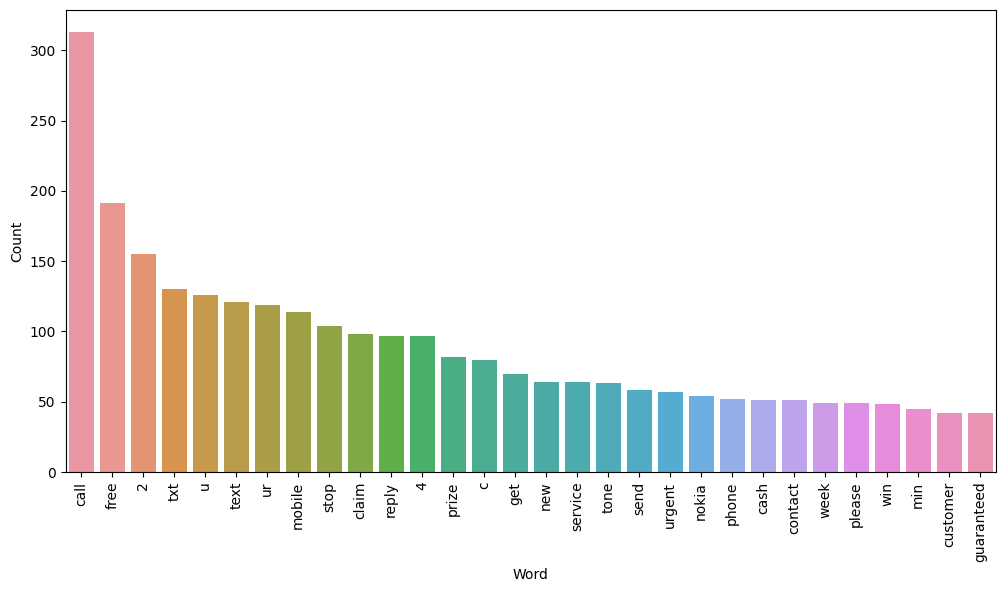

In [51]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

word_counts = Counter(spam_corpus)
most_common_words = word_counts.most_common(30)
most_common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Count', data=most_common_words_df)
plt.xticks(rotation='vertical')
plt.show()


In [52]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [53]:
len(ham_corpus)

5266

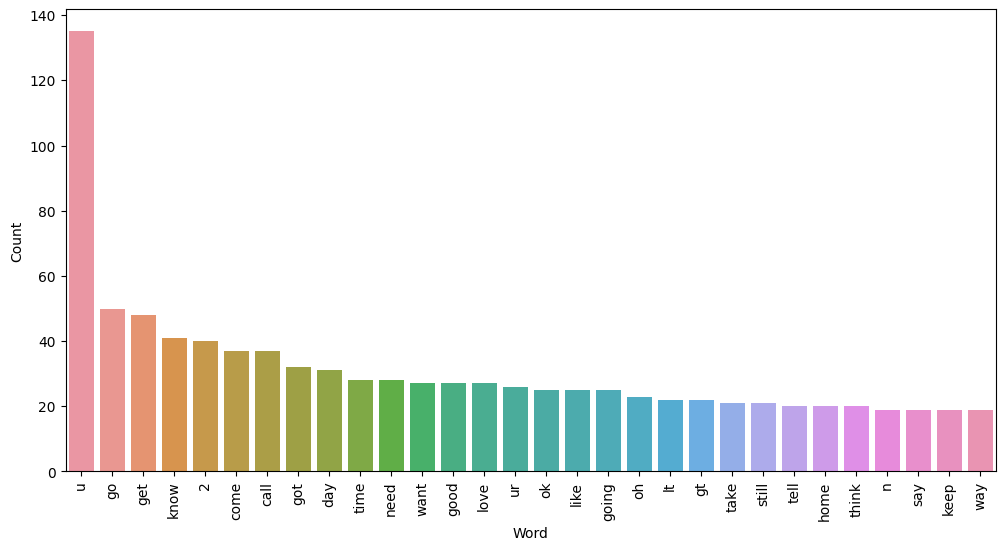

In [54]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

word_counts = Counter(ham_corpus)
most_common_words = word_counts.most_common(30)
most_common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Count', data=most_common_words_df)
plt.xticks(rotation='vertical')
plt.show()


In [55]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
3209,0,"She said,'' do u mind if I go into the bedroom...",145,43,3,said u mind go bedroom minute ok sed sexy mood...
2261,0,Did you show him and wot did he say or could u...,64,18,1,show wot say could u c 4 dust
3616,0,Sorry sent blank msg again. Yup but trying 2 d...,74,16,2,sorry sent blank msg yup trying 2 serious stud...
3181,0,"My Parents, My Kidz, My Friends n My Colleague...",130,32,5,parent kidz friend n colleague screaming surpr...
4938,0,Tomarrow i want to got to court. At &lt;DECIM...,85,26,3,tomarrow want got court lt decimal gt come bus...


In [56]:
# 4. Model Building

In [57]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000)

In [58]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [59]:
X.shape

(1306, 1000)

In [60]:
y = df['target'].values

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [86]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.metrics import f1_score

In [63]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [87]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(f1_score(y_test,y_pred1))

0.9083969465648855
[[116  14]
 [ 10 122]]
0.8970588235294118
0.9104477611940298


In [88]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(f1_score(y_test,y_pred1))

0.9007633587786259
[[115  15]
 [ 11 121]]
0.8897058823529411
0.9104477611940298


In [89]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(f1_score(y_test,y_pred1))

0.9389312977099237
[[128   2]
 [ 14 118]]
0.9833333333333333
0.9104477611940298


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [68]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [69]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [93]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    f1score=f1_score(y_test,y_pred)
    
    return accuracy,precision,f1score

In [94]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9122137404580153, 0.916030534351145, 0.9125475285171103)

In [95]:
accuracy_scores = []
precision_scores = []
f1_scores=[] 

for name,clf in clfs.items():
    
    current_accuracy,current_precision,current_f1 = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("F1 score - ",current_f1 )
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    f1_scores.append(current_f1)

For  SVC
Accuracy -  0.9122137404580153
Precision -  0.916030534351145
F1 score -  0.9125475285171103
For  KN
Accuracy -  0.6641221374045801
Precision -  1.0
F1 score -  0.5
For  NB
Accuracy -  0.9007633587786259
Precision -  0.8897058823529411
F1 score -  0.9029850746268656
For  DT
Accuracy -  0.8702290076335878
Precision -  0.8888888888888888
F1 score -  0.8682170542635659
For  LR
Accuracy -  0.8969465648854962
Precision -  0.926829268292683
F1 score -  0.8941176470588236
For  RF
Accuracy -  0.9312977099236641
Precision -  0.9672131147540983
F1 score -  0.9291338582677166
For  AdaBoost
Accuracy -  0.8931297709923665
Precision -  0.8939393939393939
F1 score -  0.8939393939393939
For  BgC
Accuracy -  0.9122137404580153
Precision -  0.8978102189781022
F1 score -  0.9144981412639405
For  ETC
Accuracy -  0.9312977099236641
Precision -  0.9523809523809523
F1 score -  0.9302325581395349
For  GBDT
Accuracy -  0.9045801526717557
Precision -  0.9349593495934959
F1 score -  0.9019607843137255
F

In [96]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'F1_score':f1_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision,F1_score
1,KN,0.664122,1.000000,0.500000
5,RF,0.931298,0.967213,0.929134
8,ETC,0.931298,0.952381,0.930233
10,xgb,0.912214,0.936000,0.910506
9,GBDT,0.904580,0.934959,0.901961
4,LR,0.896947,0.926829,0.894118
0,SVC,0.912214,0.916031,0.912548
7,BgC,0.912214,0.897810,0.914498
6,AdaBoost,0.893130,0.893939,0.893939
2,NB,0.900763,0.889706,0.902985


In [97]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.664122
1,RF,Accuracy,0.931298
2,ETC,Accuracy,0.931298
3,xgb,Accuracy,0.912214
4,GBDT,Accuracy,0.904580
5,LR,Accuracy,0.896947
6,SVC,Accuracy,0.912214
7,BgC,Accuracy,0.912214
8,AdaBoost,Accuracy,0.893130
9,NB,Accuracy,0.900763


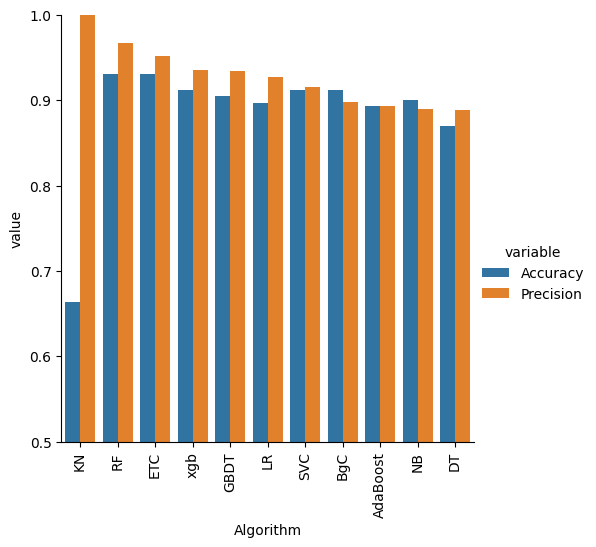

In [75]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [76]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [77]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [98]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))
print("f1 score",f1_score(y_test,y_pred))


Accuracy 0.9236641221374046
Precision 0.9307692307692308
f1 score 0.9236641221374045


In [99]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [100]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [101]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))
print("F1 score",f1_score(y_test,y_pred))

Accuracy 0.9427480916030534
Precision 0.9465648854961832
F1 score 0.9429657794676807


In [102]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [1]:
# Assuming you have already created a TfidfVectorizer object named 'tfidf'
input_mail = [input()]

# Convert text to feature vectors using the same TfidfVectorizer
input_data_features = tfidf.transform(input_mail)

# Making prediction
prediction = mnb.predict(input_data_features)


def calculate_risk_score(message):
    # Define rules and features to evaluate for risk score calculation
    rules = {
        'has_suspicious_words': set(spam_corpus),
    }

    # Initialize risk score
    risk_score = 0

    # Evaluate each rule and update the risk score accordingly
    for rule, value in rules.items():
        if rule == 'has_suspicious_words':
            for word in value:
                if word in message.lower():
                    risk_score += 1  # Increase risk score if suspicious word is found

        else:
            count = message.count(value)
            if count > 0:
                risk_score += count

    return risk_score
# Check if it's spam
if prediction[0] == 0:
    print('Ham mail')
    # Calculate the risk score for the message
    risk_score = calculate_risk_score(input_mail[0])
    print("Risk Score:", risk_score)
    # If the risk score exceeds a threshold, mark the message as spam
    if risk_score >=40:
        
        print("This message is marked as spam.")
else:
    print('Spam mail')

NameError: name 'tfidf' is not defined